In [43]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import geopandas as gpd
from geopandas import GeoSeries
import seaborn as sns
from itertools import chain
from matplotlib.colors import Normalize
from matplotlib.collections import PatchCollection
%matplotlib inline
import matplotlib.font_manager as fm
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, Polygon, MultiPoint, MultiPolygon, shape 
from shapely.prepared import prep
from pysal.esda.mapclassify import Natural_Breaks as nb
from descartes import PolygonPatch
import fiona
from fiona.crs import from_epsg
import pysal as ps
from pysal.contrib.viz import mapping as maps
from tqdm import tqdm
import geopandas
from geopandas.tools import sjoin

In [4]:
plt.style.use('seaborn-white')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12

In [5]:
def check(point, polygon):
    if any(polygon.contains(point)):
        return True
    else:
        return False

def checkPoly(point,polygonArray):
    truths = [check(point , poly) for poly in polygonArray]
    return any(truths)

In [6]:
# ogr2ogr -t_srs EPSG:4326 LB_WGS84.shp London_Borough_Excluding_MHW.shp
shp = fiona.open('../Data/Geo_Data/geo/london_wards.shp') # London_Borough_Excluding_MHW_wgs84.shp
crs_data = shp.crs
print(crs_data)
bds = shp.bounds
print (bds)
shp.close()
extra = 0.01
# bounds need to be datum-shifted
#wgs84 = pyproj.Proj("+init=EPSG:4326")
#osgb36 = pyproj.Proj("+init=EPSG:27700")
#ll = pyproj.transform(osgb36, wgs84, bds[0], bds[1])
#ur = pyproj.transform(osgb36, wgs84, bds[2], bds[3])
ll = (bds[0], bds[1])
ur = (bds[2], bds[3])
coords = list(chain(ll, ur))
print (coords)

w, h = coords[2] - coords[0], coords[3] - coords[1]

print (w,h)

{}
(-0.5103750689005356, 51.28676016315085, 0.3340155643740321, 51.691874116909894)
[-0.5103750689005356, 51.28676016315085, 0.3340155643740321, 51.691874116909894]
(0.8443906332745678, 0.4051139537590416)


In [7]:
gpd.read_file('../Data/Geo_Data/geo/london_wards.shp')

NAME AREA_CODE           DESCRIPTIO  \
0             Chessington South Ward       LBW  London Borough Ward   
1        Tolworth and Hook Rise Ward       LBW  London Borough Ward   
2                    Berrylands Ward       LBW  London Borough Ward   
3                     Alexandra Ward       LBW  London Borough Ward   
4                      Beverley Ward       LBW  London Borough Ward   
5                   Coombe Hill Ward       LBW  London Borough Ward   
6    Chessington North and Hook Ward       LBW  London Borough Ward   
7                 Surbiton Hill Ward       LBW  London Borough Ward   
8                    Old Malden Ward       LBW  London Borough Ward   
9                    St. Mark's Ward       LBW  London Borough Ward   
10                        Grove Ward       LBW  London Borough Ward   
11                      Canbury Ward       LBW  London Borough Ward   
12                     Norbiton Ward       LBW  London Borough Ward   
13                  Coombe Vale Ward       LBW  London Borough Ward   
14                    St. James Ward       LBW  London Borough Ward   
15                        Tudor Ward       LBW  London Borough Ward   
16                Coulsdon East Ward       LBW  London Borough Ward   
17         Selsdon and Ballards Ward       LBW  London Borough Ward   
18                Coulsdon West Ward       LBW  London Borough Ward   
19                       Waddon Ward       LBW  London Borough Ward   
20                       Kenley Ward       LBW  London Borough Ward   
21                       Purley Ward       LBW  London Borough Ward   
22                  Sanderstead Ward       LBW  London Borough Ward   
23                   Heathfield Ward       LBW  London Borough Ward   
24                    Fairfield Ward       LBW  London Borough Ward   
25                  Broad Green Ward       LBW  London Borough Ward   
26                West Thornton Ward       LBW  London Borough Ward   
27                Bensham Manor Ward       LBW  London Borough Ward   
28                      Norbury Ward       LBW  London Borough Ward   
29                New Addington Ward       LBW  London Borough Ward   
..                               ...       ...                  ...   
619                       Heath Ward       LBW  London Borough Ward   
620                   Whalebone Ward       LBW  London Borough Ward   
621                   Eastbrook Ward       LBW  London Borough Ward   
622              Chadwell Heath Ward       LBW  London Borough Ward   
623                    Parsloes Ward       LBW  London Borough Ward   
624              Castle Baynard Ward       LBW  London Borough Ward   
625          Farringdon Without Ward       LBW  London Borough Ward   
626           Farringdon Within Ward       LBW  London Borough Ward   
627                 Cripplegate Ward       LBW  London Borough Ward   
628                   Langbourn Ward       LBW  London Borough Ward   
629                       Tower Ward       LBW  London Borough Ward   
630                 Bishopsgate Ward       LBW  London Borough Ward   
631                  Queenhithe Ward       LBW  London Borough Ward   
632                      Vintry Ward       LBW  London Borough Ward   
633                  Cordwainer Ward       LBW  London Borough Ward   
634                Bread Street Ward       LBW  London Borough Ward   
635                       Cheap Ward       LBW  London Borough Ward   
636                   Bassishaw Ward       LBW  London Borough Ward   
637                  Aldersgate Ward       LBW  London Borough Ward   
638                     Dowgate Ward       LBW  London Borough Ward   
639                      Bridge Ward       LBW  London Borough Ward   
640                Billingsgate Ward       LBW  London Borough Ward   
641                    Walbrook Ward       LBW  London Borough Ward   
642                    Cornhill Ward       LBW  London Borough Ward   
643                 Lime Street Ward       LBW  London B

(649,
 5,
 [-0.5103750689005356, 51.28676016315085, 0.0, 0.0],
 [0.3340155643740321, 51.691874116909894, 0.0, 0.0],
 <matplotlib.collections.LineCollection at 0x7fc11a011450>)

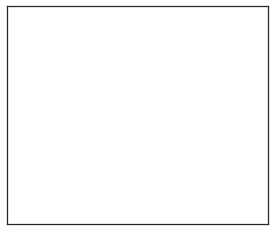

In [8]:
m = Basemap(
    projection='tmerc',
    lon_0 = -2.,
    lat_0 = 49.,
    ellps = 'WGS84',
    llcrnrlon=coords[0] - extra * w,
    llcrnrlat=coords[1] - extra + 0.01 * h,
    urcrnrlon=coords[2] + extra * w,
    urcrnrlat=coords[3] + extra + 0.01 * h,
    lat_ts=0,
    resolution='i',
    suppress_ticks=True)

m.readshapefile(
    '../Data/Geo_Data/geo/london_wards',
    'london',
    color='none',
    zorder=2)

In [9]:
london_polys = []
borough_names = []
for w_ind in range(len(m.london_info)):
    w = m.london_info[w_ind]
    if w['NAME'] in borough_names:
        london_polys[-1] = Polygon(m.london[w_ind])
        continue
    borough_names.append(w['NAME'])    
    london_polys.append(Polygon(m.london[w_ind]))
    
df_map = pd.DataFrame({
    'poly': london_polys,
    'borough_name': borough_names,
})
df_map['area_m'] = df_map['poly'].map(lambda x: x.area)
df_map['area_km'] = df_map['area_m'] / 100000
df_map['borough_name'] = df_map['borough_name'].str.strip()

In [22]:
segnet_GSV_points = '../Data/Geo_Data/GreaterLondon_NoRot_segnet.csv'
london_points = '../Data/Geo_Data/greater_london_points.csv'

In [23]:
SegnetLabels = ['Sky', 'Building', 'Pole','Road Marking','Road','Pavement','Tree','Sign Symbol','Fence','Vehicle','Pedestrian', 'Bike']

In [28]:
mergedDict = {}

In [37]:
gsview_lonlat = {}
fdata = {}
fdata_map_points = {}
gsview_data = {}
all_tags = {}
count = 0
threshold = 0.95

with open(london_points, 'r') as infile:
    for line in infile:
        fields = line.strip().split(',')
        gsview_lonlat['_'.join([fields[0], fields[1], '0'])] = (float(fields[2]),float(fields[3]))               
        
count = 0
with open(data_file1, 'r') as infile:
    for line in infile:
        count += 1
        
        if count == 1:
            continue
        fields = line.strip().split('|')
        # ignore the rotation tag 0,1,2,4 for angle of rotation
        if len(fields) < 2:
            continue
            
        way_id   = fields[0]
        point_id = fields[1]
        rotation = fields[2]

        mergedDict[way_id+'_'+point_id] = {}
        mergedDict[way_id+'_'+point_id]['id'] = way_id+'_'+point_id
        fields[3] = fields[3][1:-1]
        scene_list = list(map(float, fields[3].split(', ')))
        latitude  = gsview_lonlat['_'.join(fields[:3])][0]
        longitude = gsview_lonlat['_'.join(fields[:3])][1]
        mergedDict[way_id+'_'+point_id]['geometry'] = Point(float(longitude),float(latitude))
        for i in range(len(SegnetLabels)):
            mergedDict[way_id+'_'+point_id][SegnetLabels[i]] = scene_list[i]
        fdata_map_points[m(longitude, latitude)] = scene_list

In [38]:
merged_df = pd.DataFrame.from_dict(mergedDict, orient='index')

In [39]:
fdata_map_points

{(20517.185630330394, 40863.50581593756): [0.22247685185185184,
  0.4168865740740741,
  0.012337962962962964,
  0.0002719907407407407,
  0.0015451388888888889,
  0.15171875,
  0.1648726851851852,
  0.000931712962962963,
  0.014791666666666667,
  0.007638888888888889,
  0.005462962962962963,
  0.0010648148148148149],
 (43165.67951267029, 19464.876397208107): [0.38050347222222225,
  0.11986689814814815,
  0.003396990740740741,
  2.3148148148148147e-05,
  0.06836805555555556,
  0.03594907407407407,
  0.09828703703703703,
  0.004681712962962963,
  0.11833912037037037,
  0.17058449074074075,
  0.0,
  0.0],
 (37104.822704755235, 37772.866367558454): [0.3083564814814815,
  0.13986689814814815,
  0.002065972222222222,
  0.020520833333333332,
  0.19172453703703704,
  0.05556134259259259,
  0.19820023148148147,
  0.0009722222222222222,
  0.014704861111111111,
  0.06498263888888889,
  0.0030324074074074073,
  1.1574074074074073e-05],
 (36078.14906228101, 15478.40667836761): [0.2430150462962963,
 

In [40]:
# map_points = pd.Series(
#     [Point(map_point) for map_point in fdata_map_points])
# plaque_points = MultiPoint(list(map_points.values))
# wards_polygon = prep(MultiPolygon(list(df_map['poly'].values)))
# # calculate points that fall within the London boundary
# ldn_points = list(filter(wards_polygon.contains, plaque_points))

In [41]:
merged_df.head()

Building     Fence  \
100015720_4707372269  0.360388  0.223432   
100026128_196479      0.023356  0.077905   
100026129_3177639205  0.424144  0.000000   
100026130_1447888934  0.147905  0.013351   
100026131_3177639208  0.690498  0.000006   

                                                    geometry      Tree  \
100015720_4707372269           POINT (-0.1156583 51.4994793)  0.126250   
100026128_196479               POINT (-0.0822003 51.6157085)  0.317645   
100026129_3177639205           POINT (-0.0862401 51.6162867)  0.009404   
100026130_1447888934           POINT (-0.0893428 51.6163268)  0.012170   
100026131_3177639208  POINT (-0.08622299999999999 51.616374)  0.000874   

                      Sign Symbol       Sky  Pavement  Pedestrian      Pole  \
100015720_4707372269     0.002836  0.119988  0.140093    0.012957  0.013953   
100026128_196479         0.000278  0.406238  0.044954    0.000012  0.009144   
100026129_3177639205     0.000041  0.169566  0.100567    0.003148  0.011157   
100026130_1447888934     0.002315  0.419578  0.081846    0.000006  0.004225   
100026131_3177639208     0.000000  0.231082  0.051800    0.000000  0.000012   

                          Bike   Vehicle  Road Marking                    id  \
100015720_4707372269  0.000000  0.000029      0.000000  100015720_4707372269   
100026128_196479      0.000000  0.003588      0.001348      100026128_196479   
100026129_3177639205  0.000058  0.025532      0.013906  100026129_3177639205   
100026130_1447888934  0.000000  0.002159      0.022691  100026130_1447888934   
100026131_3177639208  0.000336  0.006887      0.000301  100026131_3177639208   

                          Road  
100015720_4707372269  0.000075  
100026128_196479      0.115532  
100026129_3177639205  0.242477  
100026130_1447888934  0.293756  
100026131_3177639208  0.018206

In [45]:
merged_gdf = geopandas.GeoDataFrame(merged_df, geometry='geometry')

In [46]:
merged_gdf

Building     Fence                   geometry      Tree  \
100015720_4707372269  0.360388  0.223432  POINT (-0.11566 51.49948)  0.126250   
100026128_196479      0.023356  0.077905  POINT (-0.08220 51.61571)  0.317645   
100026129_3177639205  0.424144  0.000000  POINT (-0.08624 51.61629)  0.009404   
100026130_1447888934  0.147905  0.013351  POINT (-0.08934 51.61633)  0.012170   
100026131_3177639208  0.690498  0.000006  POINT (-0.08622 51.61637)  0.000874   
100076118_34595443    0.071140  0.015938  POINT (-0.00625 51.55732)  0.095723   
100076137_119010081   0.272795  0.007569   POINT (0.03554 51.54842)  0.170966   
100076140_119011344   0.346534  0.027292   POINT (0.03527 51.55050)  0.224948   
100076152_126612648   0.634288  0.024225   POINT (0.01661 51.52544)  0.156748   
100076154_5355094129  0.139606  0.052396   POINT (0.00479 51.52747)  0.313530   
100076156_1346240122  0.790029  0.000498   POINT (0.01165 51.51962)  0.028056   
100076157_126579689   0.278744  0.034566   POINT (0.00978 51.51972)  0.044826   
100077167_4457798822  0.219363  0.001725  POINT (-0.12302 51.51137)  0.042407   
100124714_5249445851  0.130411  0.042980  POINT (-0.05421 51.49057)  0.062506   
100149892_1561523387  0.005619  0.000318   POINT (0.05582 51.36544)  0.863356   
100149895_1157660058  0.042795  0.007708   POINT (0.05595 51.36507)  0.891672   
100149910_1157660166  0.416082  0.001238   POINT (0.05701 51.36515)  0.028779   
100168392_1157829175  0.611094  0.018038   POINT (0.18955 51.52619)  0.053096   
100168393_1157829199  0.308791  0.037512   POINT (0.19057 51.52660)  0.181950   
100170841_4528699188  0.270868  0.004763   POINT (0.19924 51.51558)  0.037517   
100175809_2257873048  0.539456  0.004618  POINT (-0.29774 51.53167)  0.156331   
100175811_1157879129  0.010428  0.048322  POINT (-0.29210 51.52974)  0.513275   
100177469_255141651   0.285770  0.117095   POINT (0.21919 51.52457)  0.048872   
100177710_1157897002  0.079595  0.000012   POINT (0.23270 51.53294)  0.649433   
100180734_1157940063  0.530255  0.017332   POINT (0.22100 51.55816)  0.065469   
100184556_1158013020  0.220475  0.033970   POINT (0.24186 51.55695)  0.252917   
100185281_1158023185  0.033976  0.041620   POINT (0.24685 51.55622)  0.311348   
100185282_185675487   0.093542  0.014259   POINT (0.23491 51.54962)  0.173414   
100186827_1158038874  0.229346  0.062303   POINT (0.24197 51.54939)  0.223970   
100189366_138124655   0.270990  0.016453   POINT (0.27060 51.55685)  0.234687   
...                        ...       ...                        ...       ...   
99895809_130191458    0.301343  0.041123   POINT (0.02173 51.53464)  0.220266   
99895836_269139942    0.323536  0.076863   POINT (0.01297 51.53531)  0.099225   
99895838_130192012    0.243970  0.035579   POINT (0.01106 51.53592)  0.029363   
99895841_3381605244   0.098900  0.034769   POINT (0.00802 51.53608)  0.654485   
99895878_325660764    0.271140  0.001291   POINT (0.02015 51.53100)  0.071192   
99951410_21990637     0.144566  0.070255  POINT (-0.10065 51.51825)  0.254253   
99951687_2518586231   0.235712  0.003229   POINT (0.03030 51.51694)  0.016534   
99951689_4062866618   0.026985  0.009641   POINT (0.03656 51.51798)  0.063391   
99951691_1203378805   0.029549  0.024109   POINT (0.03188 51.51682)  0.064068   
99951717_4549150018   0.631036  0.013727   POINT (0.05794 51.54843)  0.004659   
99951718_118993763    0.283744  0.003223   POINT (0.06002 51.54883)  0.027153   
99951750_117872184    0.186470  0.019034   POINT (0.06288 51.53323)  0.063345   
99951761_117872138    0.547749  0.030741   POINT (0.06607 51.53290)  0.012500   
99951771_116101487    0.133293  0.061441   POINT (0.04567 51.53154)  0.281470   
99954115_4159068038   0.496036  0.008738  POINT (-0.07185 51.52090)  0.008385   
99954119_34104964     0.322211  0.049051  POINT (-0.06828 51.53015)  0.061730   
99954124_3309729116   0.278958  0.000903  POINT (-0.07210 51.52836)  0.399178   
99954127_48295059     0.274375  0.021453  POINT (-0.0

In [47]:
London = gpd.read_file('../Data/Geo_Data/statistical-gis-boundaries-london/ESRI/London_Borough_Excluding_MHW.shp')

In [48]:
London.head()

NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER SUB_2009  \
0  Kingston upon Thames  E09000021   3726.117       0.000         F            
1               Croydon  E09000008   8649.441       0.000         F            
2               Bromley  E09000006  15013.487       0.000         F            
3              Hounslow  E09000018   5658.541      60.755         F            
4                Ealing  E09000009   5554.428       0.000         F            

  SUB_2006                                           geometry  
0           POLYGON ((516401.600 160201.800, 516407.300 16...  
1           POLYGON ((535009.200 159504.700, 535005.500 15...  
2           POLYGON ((540373.600 157530.400, 540361.200 15...  
3           POLYGON ((521975.800 178100.000, 521967.700 17...  
4           POLYGON ((510253.500 182881.600, 510249.900 18...

In [49]:
tree_data = pd.read_csv('../Data/Geo_Data/london_street_trees_gla_20180214.csv')

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [50]:
roads = gpd.read_file('../Data/GreaterLondon/edges/edges.shp')

In [51]:
#create buffer along ever road of 20 meters
roads['geometry'] = roads['geometry'].buffer(20)

In [52]:
#prokject back the road polygons in lat long space
roads_WGS84 = roads.to_crs({'proj':'longlat', 'ellps':'WGS84', 'datum':'WGS84'})

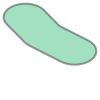

In [99]:
roads_WGS84.iloc[1]['geometry']

In [53]:
treeLocations = []

for index , row in tree_data.iterrows():
#     point = Point(m(row['longitude'], row['latitude']))
    point = Point(row['longitude'], row['latitude'])
#     point = Point(transform(inProj,outProj,row['longitude'], row['latitude']))
    treeLocations.append(point)

print treeLocations[1]

tree_points = pd.Series(treeLocations)
tree_data_points = MultiPoint(list(tree_points.values))

POINT (0.1391226851333678 51.58566970615966)


In [63]:
mapLocations = {}
for index , row in merged_gdf.iterrows():
#     point = Point(m(row['long'], row['lat']))
    point = row['geometry']
    mapLocations[index] = point

In [64]:
from dask import dataframe
import multiprocessing
from tqdm import tqdm
tqdm.pandas()

def distKm(Points_tuple):
    return distance(Points_tuple[0], Points_tuple[1]).km


def pointsCount(geometry , points):
    within = []
    for p in points: 
        if p.within(geometry):
            within.append(p)
    return within

def approxPointsCount(geometry, points):
    bufferdist = 0.01
    poly = geometry.buffer(bufferdist)
    centroid = poly.centroid.xy
    print centroid
    within = []
    for p in points: 
        if distance(p,centroid) <= bufferdist:
            within.append(p)
    return pd.Series(within)

def filterMappilary(geometry , pointsKeys):
    within = []
    for k in pointsKeys: 
        p = pointsKeys[k]
        if p.within(geometry):
            within.append(k)
    return within

In [57]:
%store -r within_trees

In [59]:
for index, row in roads_WGS84.iterrows():
    roads_WGS84.at[index,'trees'] = len(within_trees[index])

In [60]:
roads_filtered = roads_WGS84[roads_WGS84['trees']>10]

In [61]:
len(roads_filtered)

22544

In [62]:
roads_filtered_dd = dataframe.from_pandas(roads_filtered,npartitions=2*multiprocessing.cpu_count())

In [ ]:
# within_mp  = roads_filtered_dd.map_partitions(lambda df:df['geometry'].progress_apply(filterMappilary, args = [mapLocations]), meta=pd.Series('list')).compute(scheduler='processes')

 78%|███████▊  | 440/564 [03:46<01:01,  2.02it/s]

In [68]:
store -r within_gsv

In [69]:
within_gsv

11                                                       []
30                                   [507052695_2155411693]
37                 [8129417_3455777475, 3789875_3455777469]
39                                                       []
49                                     [26357710_288788862]
51                                                       []
52                                                       []
64                                                       []
66        [3789884_18874405, 3789890_18874432, 3789896_3...
67                                       [3789884_18874405]
68                     [3789884_18874405, 3789888_18874407]
70                 [25917366_149596849, 15136599_149597033]
76                                     [26358815_288788925]
95                                       [3789897_18874426]
111                  [26358847_14680131, 3360915_772947969]
121                                      [509602603_299359]
122                                     

In [70]:
for k in within_gsv.index:
    if len(within_gsv[k]) > 0:
        map_trees = merged_gdf[merged_gdf['id'].isin(within_gsv[k])]
        roads_WGS84.at[k,'GSV_trees'] = np.sum(map_trees['Tree'])+0.000001
        roads_WGS84.at[k,'GSV_samples'] = len(map_trees)

In [72]:
final_roads = roads_WGS84[roads_WGS84[['GSV_trees', 'GSV_samples']].notnull().all(1)]

In [73]:
final_roads.head()

access area bridge est_width        from      highway    junction key  \
30                               2155411693    secondary               0   
37                                 18874387    secondary               0   
49                                 14680091  residential  roundabout   0   
66                                 18874433  residential               0   
67                                 18874412  residential               0   

   lanes   length  ...                              osmid   ref service  \
30        117.355  ...  [626779194, 626779197, 507052695]  B214           
37         30.876  ...                            8129417  B349           
49         15.036  ...                           26358804                 
66        237.986  ...                            3789896                 
67        100.473  ...                            3789884                 

            to tunnel width  \
30   105687725                
37  3455777475                
49    14680092                
66    18874405                
67    18874405                

                                             geometry trees GSV_trees  \
30  POLYGON ((-0.09003 51.48301, -0.08997 51.48302...  26.0  0.340904   
37  POLYGON ((-0.24707 51.47327, -0.24710 51.47310...  11.0  0.789335   
49  POLYGON ((-0.42423 51.45006, -0.42422 51.45008...  11.0  0.557188   
66  POLYGON ((-0.25118 51.47315, -0.25119 51.47315...  30.0  0.820024   
67  POLYGON ((-0.24920 51.47175, -0.24918 51.47176...  16.0  0.124445   

   GSV_samples  
30         1.0  
37         2.0  
49         1.0  
66         3.0  
67         1.0  

[5 rows x 23 columns]

In [75]:
final_roads = final_roads[final_roads['trees'] > 10 ] 

In [76]:
len(final_roads)

16106

In [77]:
final_roads['Tree_density'] = 0.00001
final_roads['Tree_pixel_density'] = 0.00001

In [78]:
minValue = min(final_roads['GSV_trees'])
print minValue

1e-06


In [80]:
for index , row in final_roads.iterrows():
    tree_density =  np.log(float(row['trees'])/float(row['length'])) 
    pixel_density = np.log(float(row['GSV_trees'])/float(row['length']))
#     print tree_density , pixel_density
    final_roads.at[index,'Tree_density'] = tree_density
    final_roads.at[index,'Tree_pixel_density'] = pixel_density

(0.387837421293957, 0.0)


/usr/local/lib/python2.7/dist-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


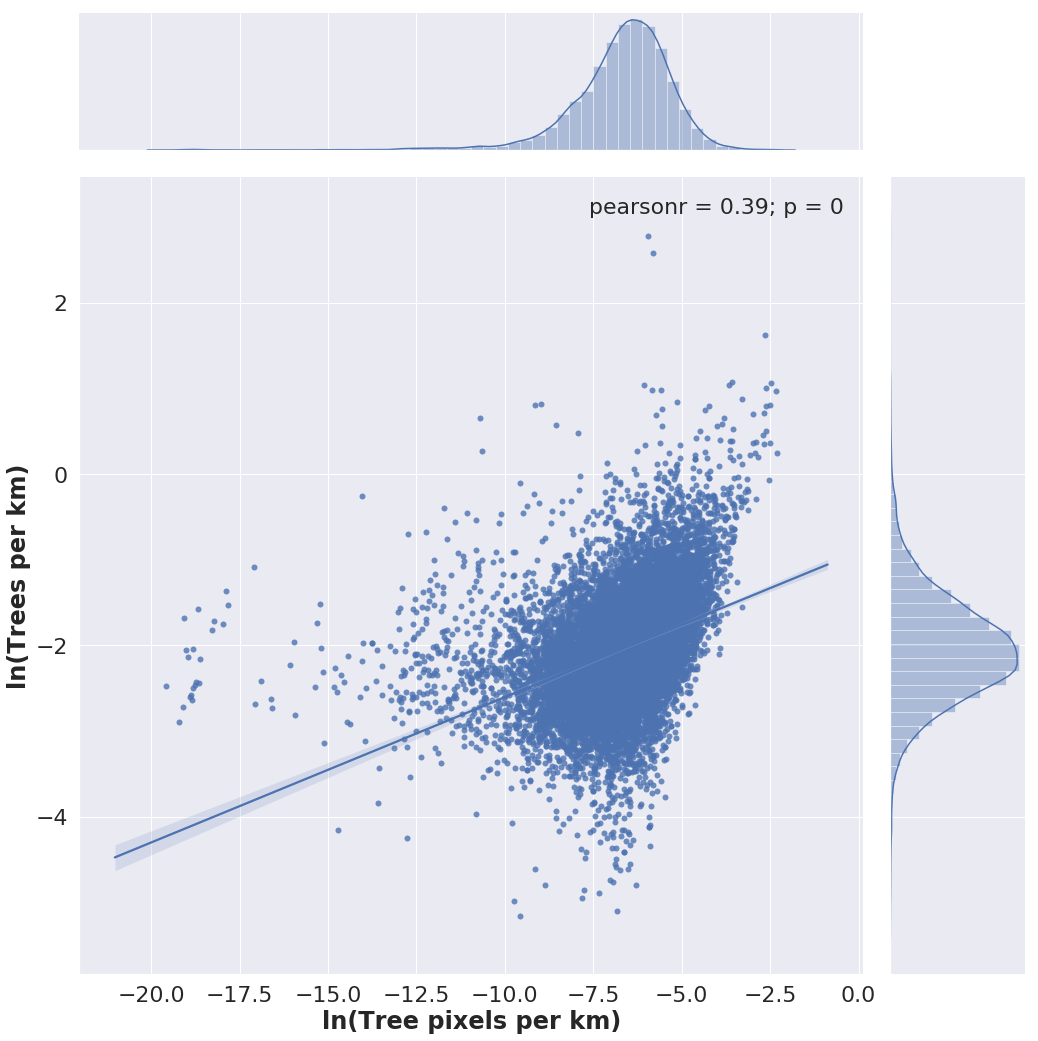

In [81]:
from scipy.stats import pearsonr
corr = pearsonr(final_roads['Tree_density'],final_roads['Tree_pixel_density'])
print corr
# fig, ax = plt.subplots()
# fig.set_size_inches(16,12)
sns.set(font_scale=2) 
ax = sns.jointplot(x=final_roads['Tree_pixel_density'], y=final_roads['Tree_density'], kind='regression',height=15);
plt.xlabel('ln(Tree pixels per km)')
plt.ylabel('ln(Trees per km)')
# ax.annotate("Pearson r: " +  str(corr[0])[:4] + '***',fontsize = 20)
ax.annotate(pearsonr)

In [83]:
final_roads['samples_per_km'] = 0.0
for i , row in final_roads.iterrows():
    density = float(row['GSV_samples'])/float(row['length'])
    final_roads.at[i,'samples_per_km'] = density

In [90]:
final_roads['decile'] = pd.qcut(final_roads['GSV_samples'].rank(method='first'), 10)

In [92]:
corrs = []
bins = []
for name, group in final_roads.groupby('decile'):
    bins.append(name)
    corr = pearsonr(group['Tree_density'],group['Tree_pixel_density'])
    corrs.append(corr)

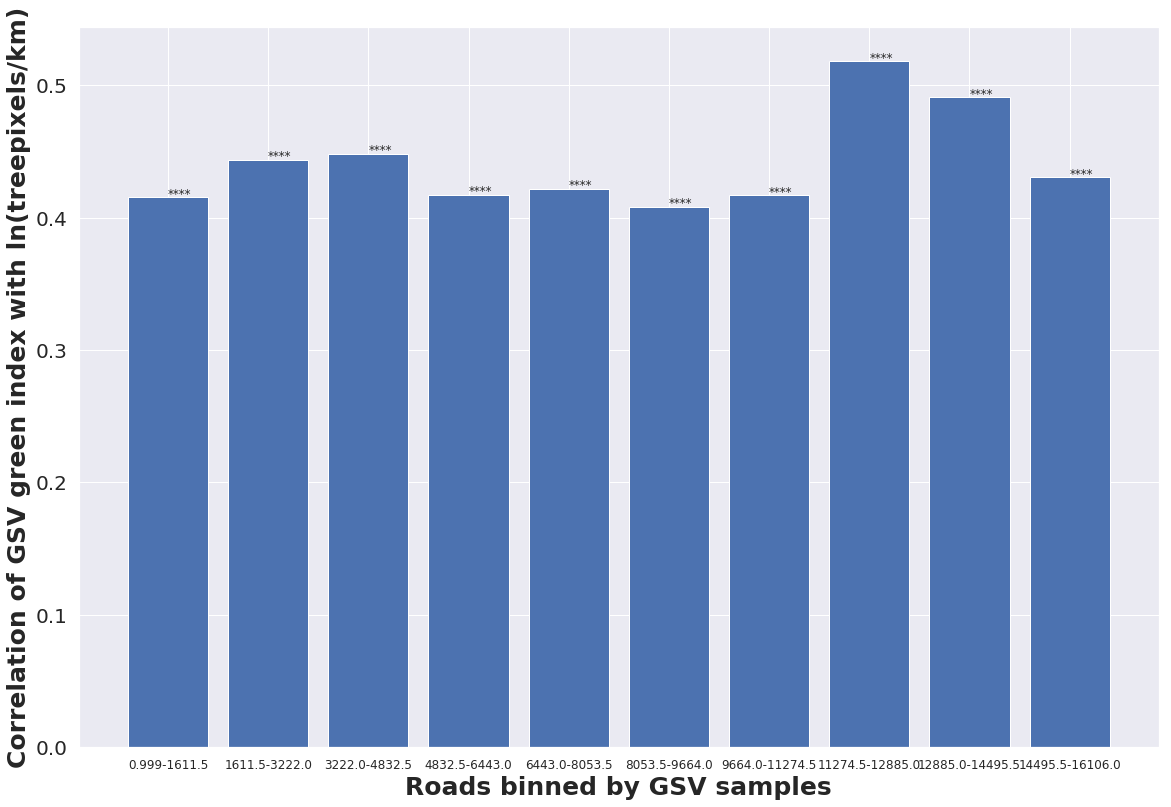

In [96]:
fig = plt.figure()
fig.set_size_inches(15, 10)
ax = fig.add_axes([0,0,1,1])
plt.xlabel("Roads binned by GSV samples",fontsize = 25)
plt.ylabel("Correlation of GSV green index with ln(treepixels/km)",fontsize = 25)
xlabels = [str(b.left)+'-'+str(b.right) for b in bins]
c = [corr[0] for corr in corrs]
ax.bar(xlabels,c)

p = []
for corr in corrs: 
    if corr[1] > 0.05:
        p.append('ns')
    elif corr[1] <= 0.05 and corr[1] > 0.01  :
        p.append('*')
    elif corr[1] <= 0.01 and corr[1] > 0.001:
        p.append('**')
    elif corr[1] <= 0.001 and corr[1] > 0.0001:
        p.append('**')
    elif corr[1] <= 0.0001 and corr[1] > 0.00001:
        p.append('***')
    else :
        p.append('****')
for xi, yi, l in zip(*[xlabels, c, p]):
    ax.text(xi, yi, l , fontsize = 12)
    
    
plt.xticks(fontsize=12)
plt.yticks(fontsize=20)
plt.show()

In [97]:
def ann(row):
    ind = row[0]
    r = row[1]
    plt.gca().annotate(r['name'], xy=(r["Tree_density"], r["Tree_pixel_density"]), 
            xytext=(2,2) , textcoords ="offset points", fontsize = 10)

(0.41555250372406677, 2.7886630563572745e-68)
(0.4436154035181685, 1.2119887626708974e-78)
(0.44809586430048354, 2.4305504227635842e-80)
(0.41719064993874766, 7.364065942838718e-69)
(0.4216899616060033, 2.0177281606947952e-70)
(0.40833386830854584, 9.02878959092785e-66)
(0.41665113239860224, 1.2573757275670533e-68)
(0.5178512724297809, 3.1746672727925125e-111)
(0.4906644340947274, 2.727396281485928e-98)
(0.43024983226763486, 1.3826827793853867e-73)


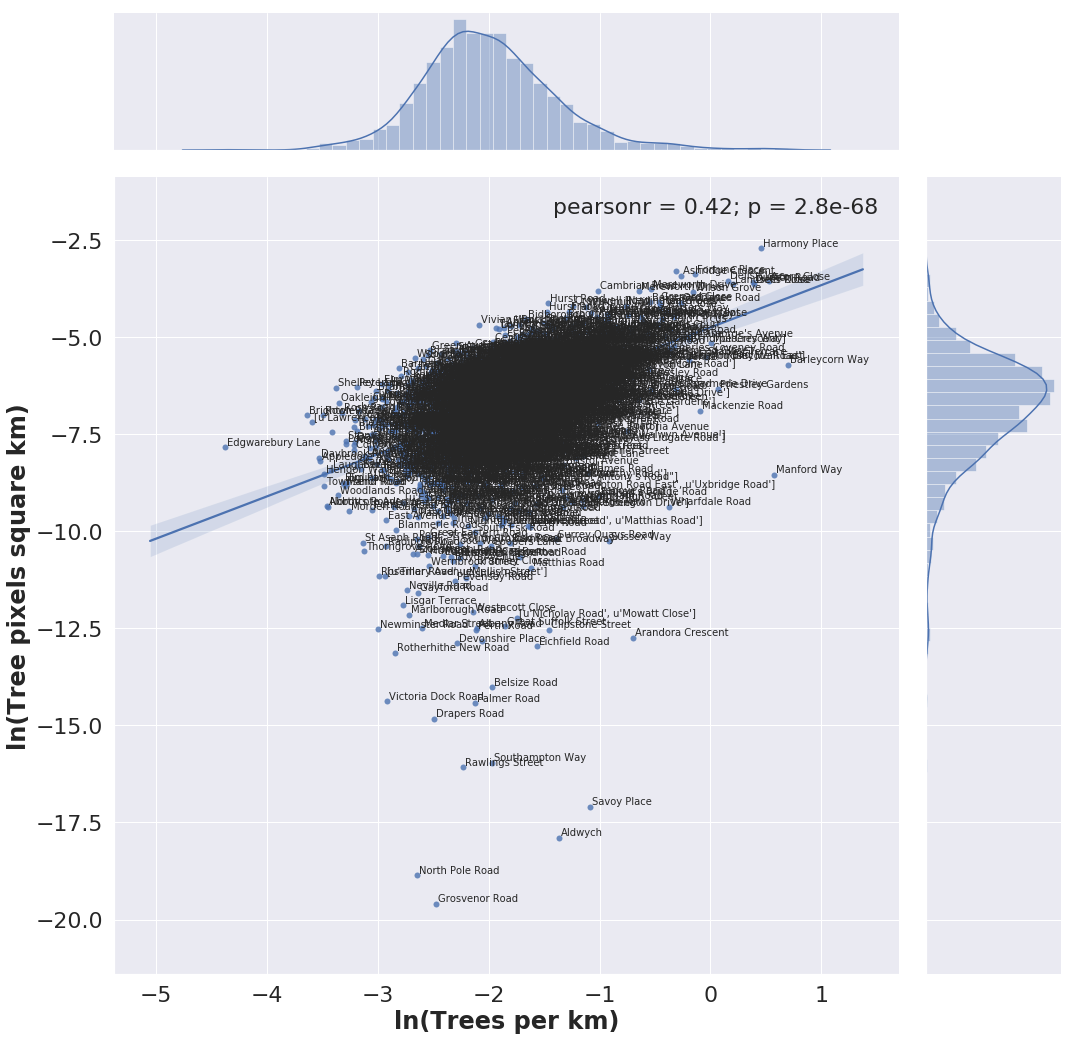

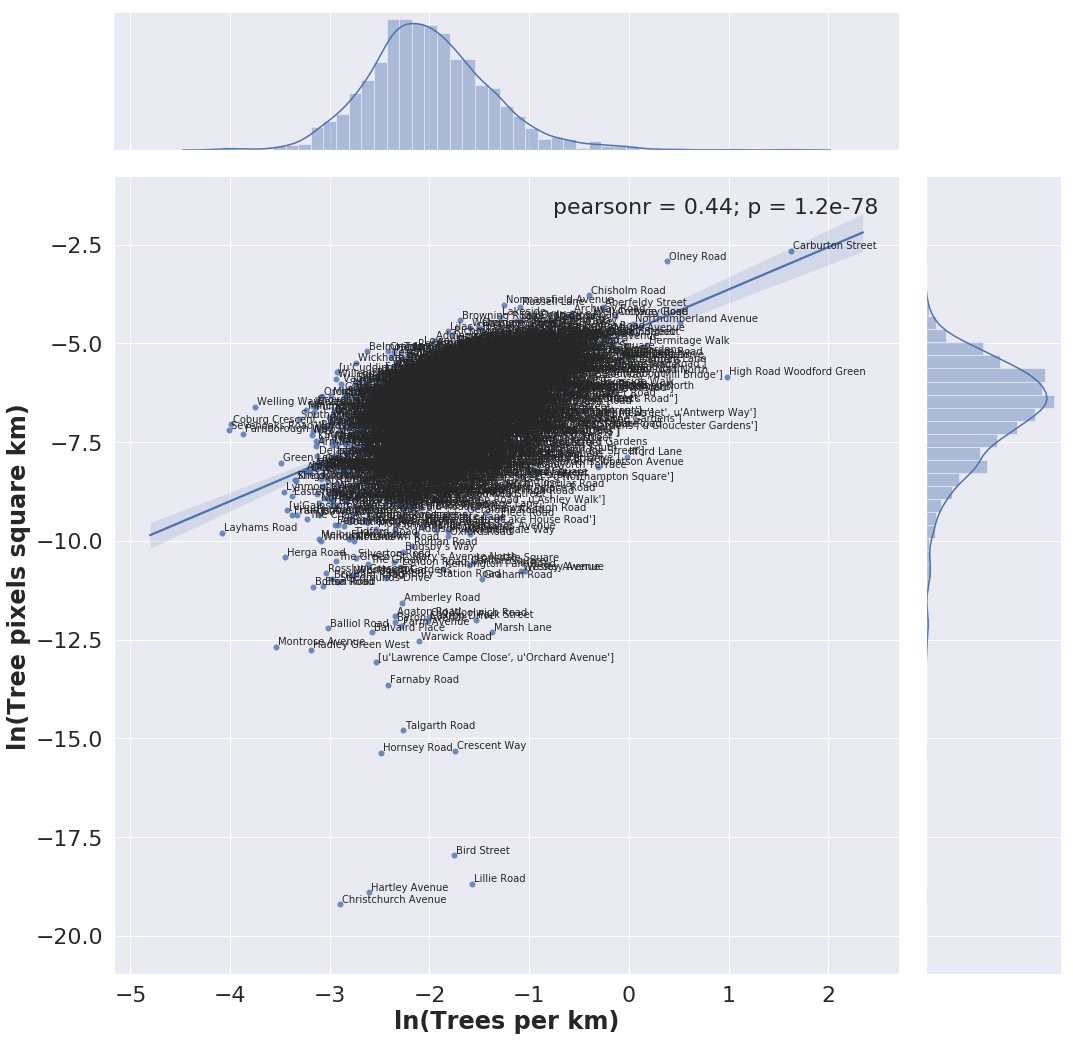

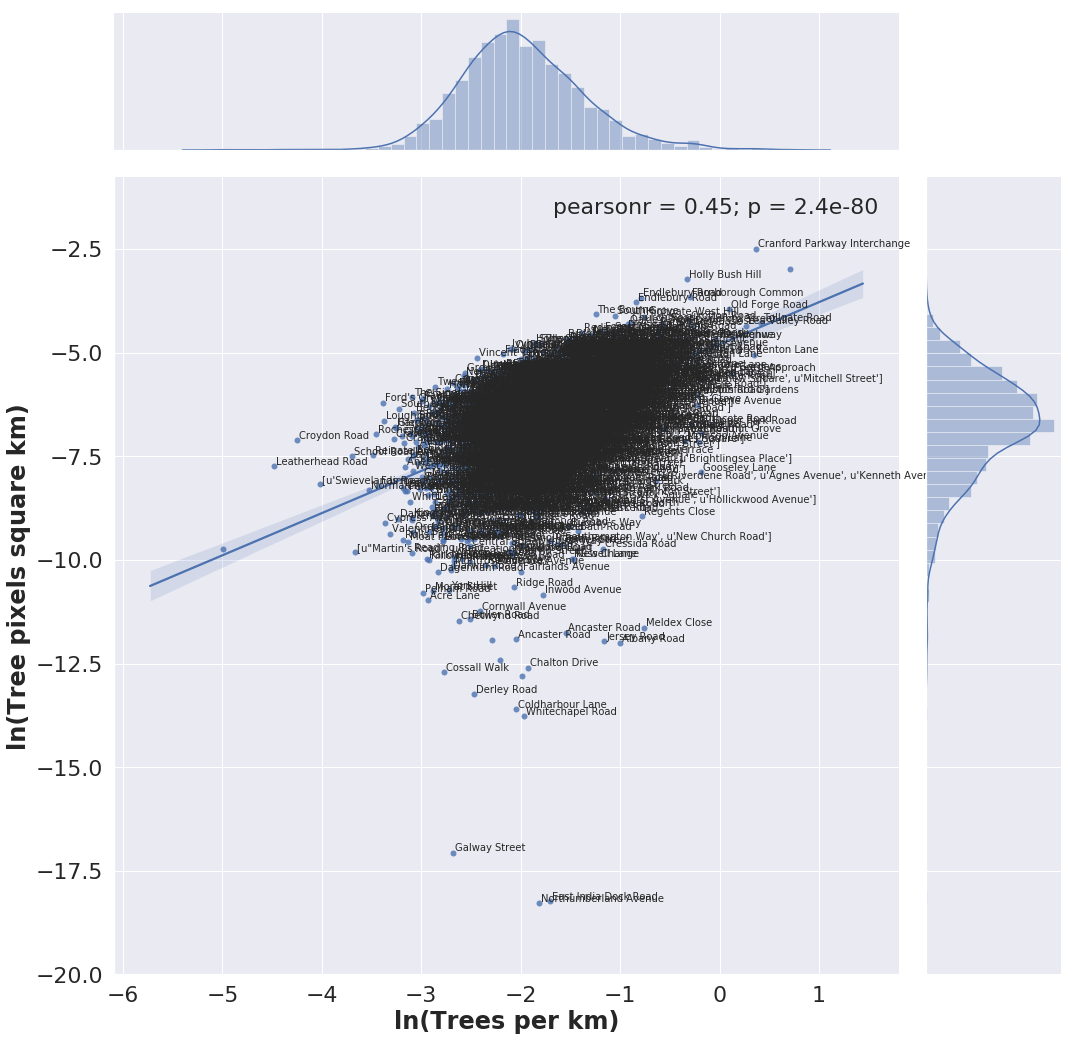

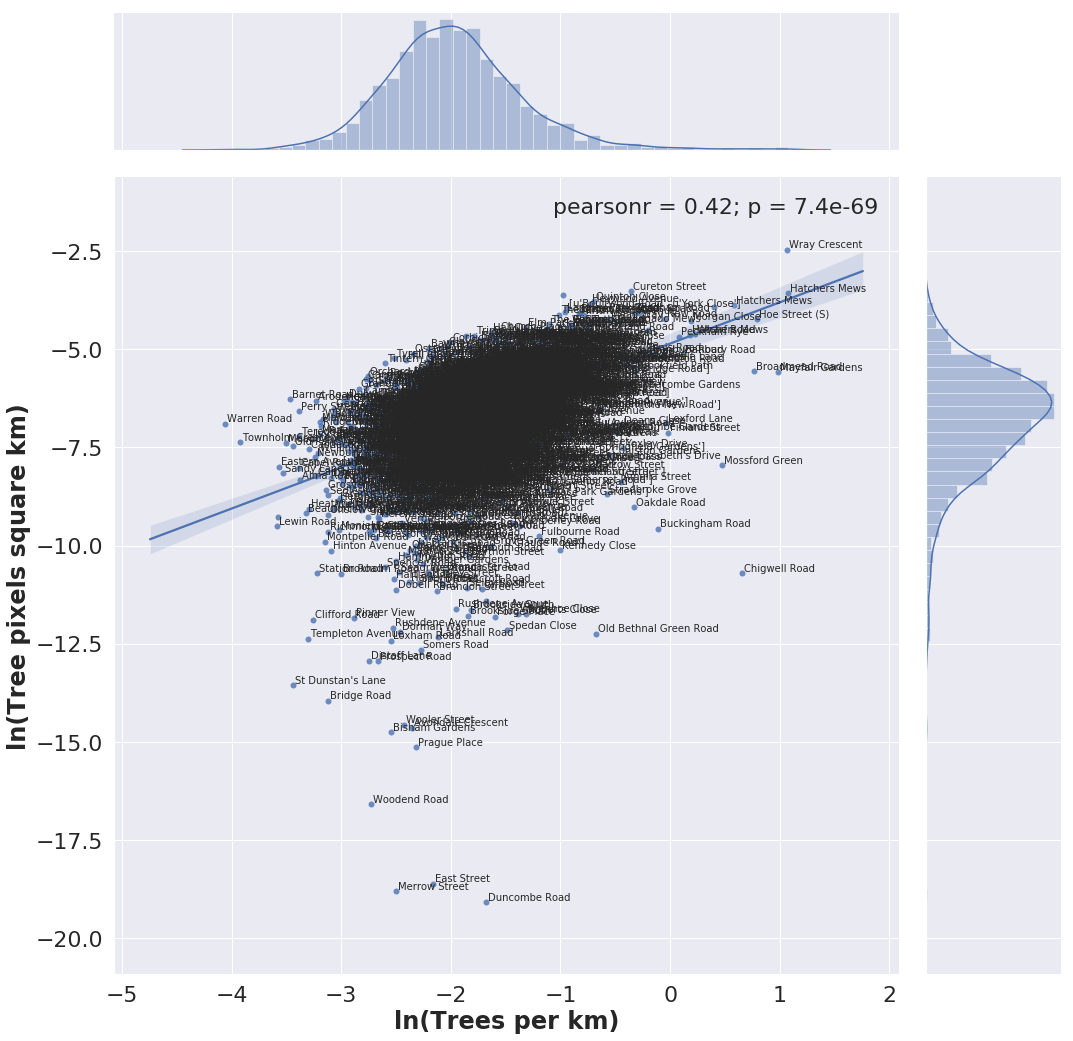

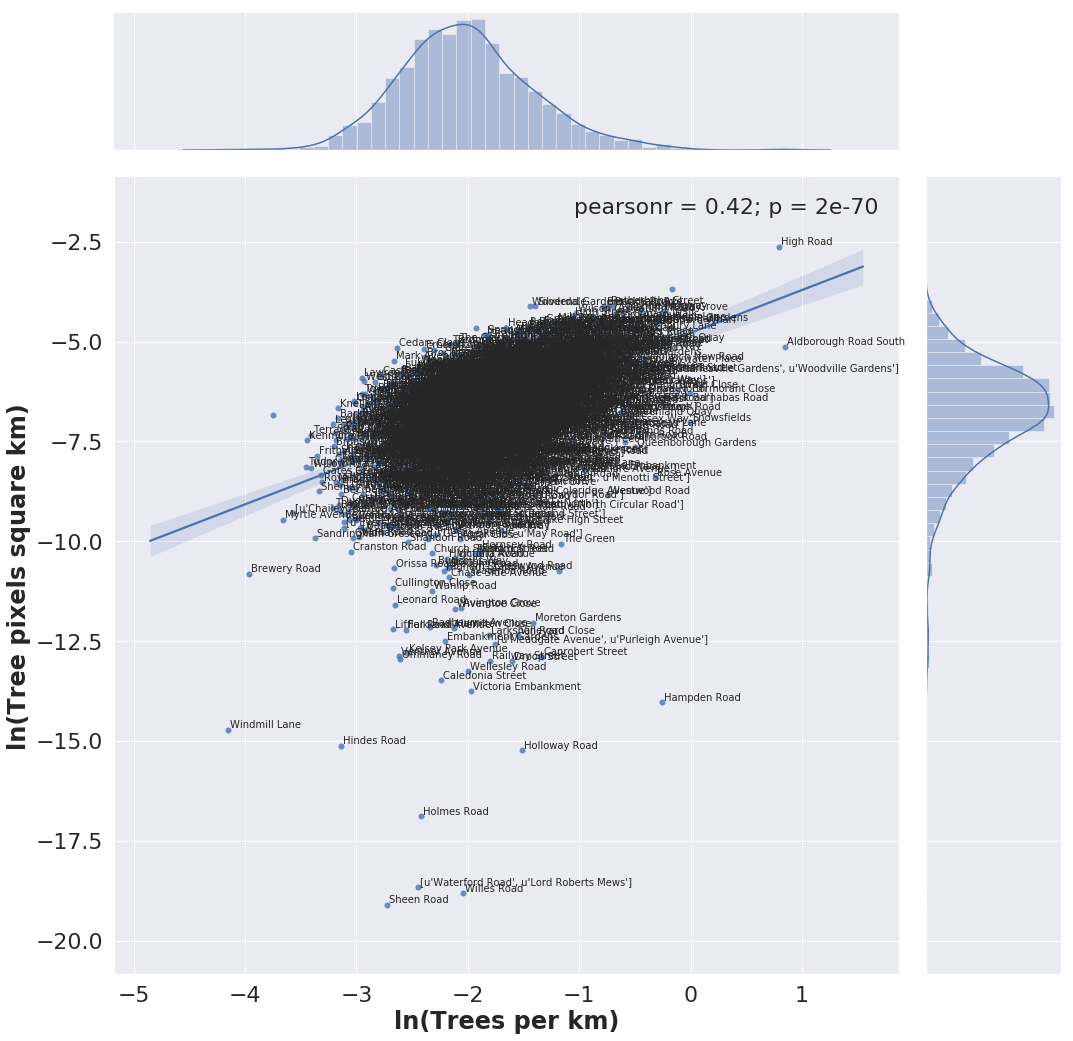

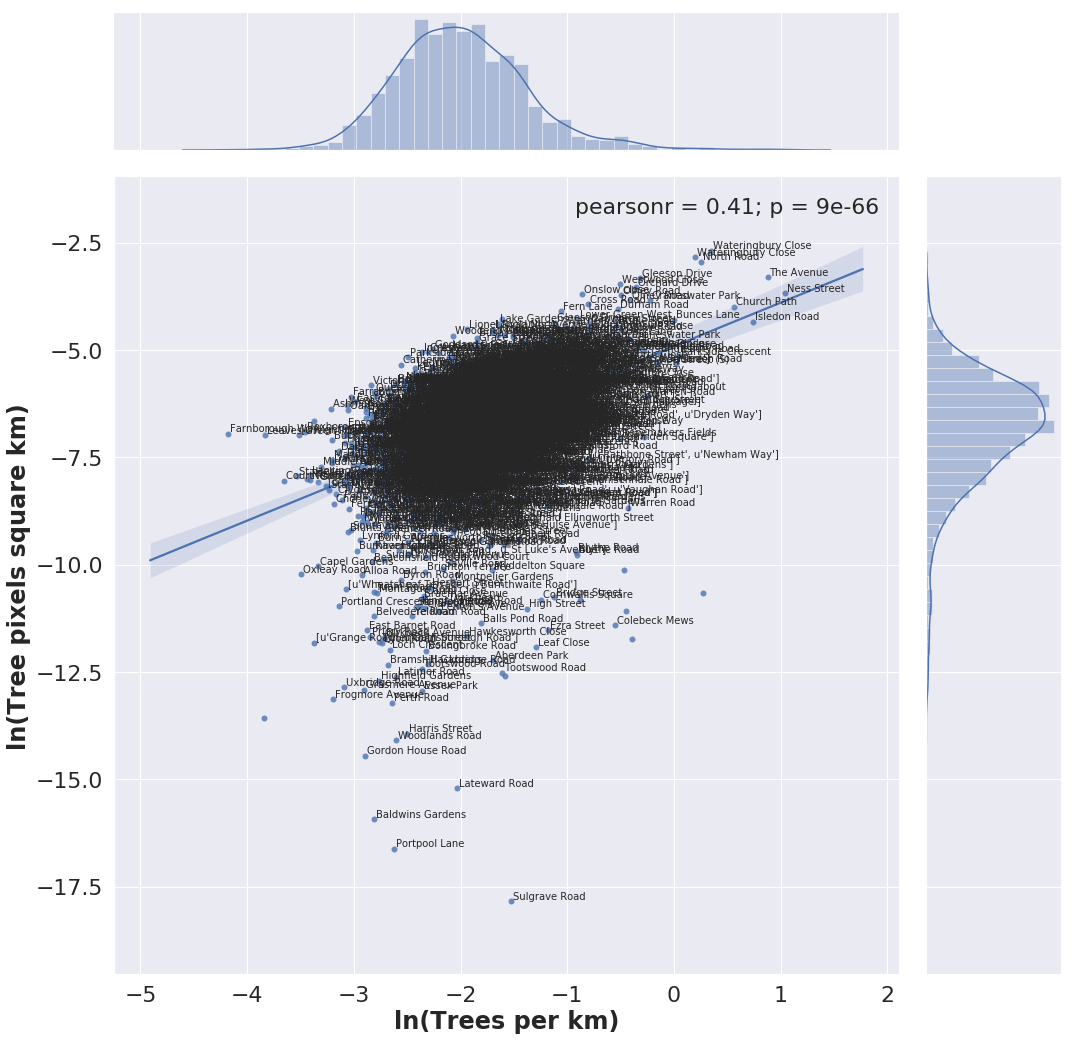

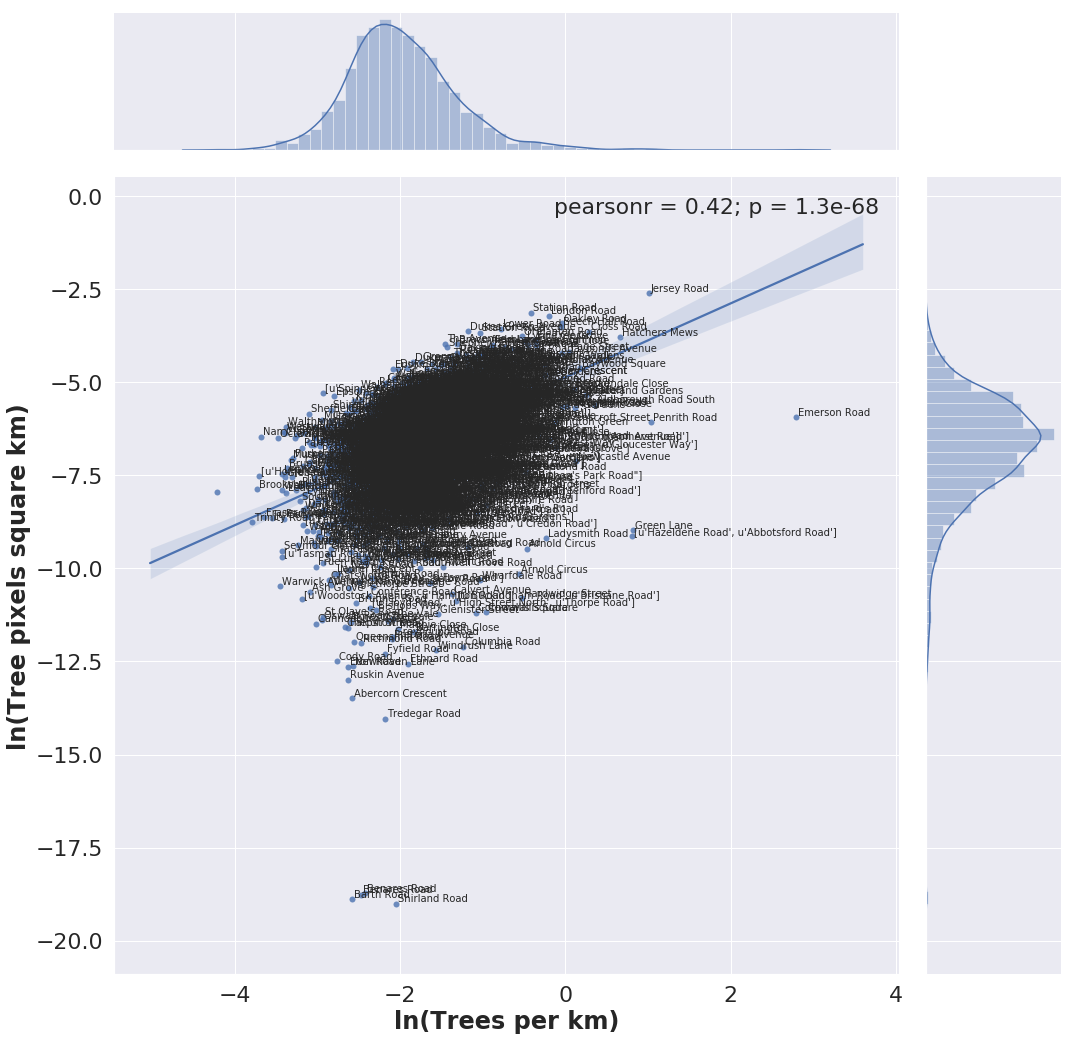

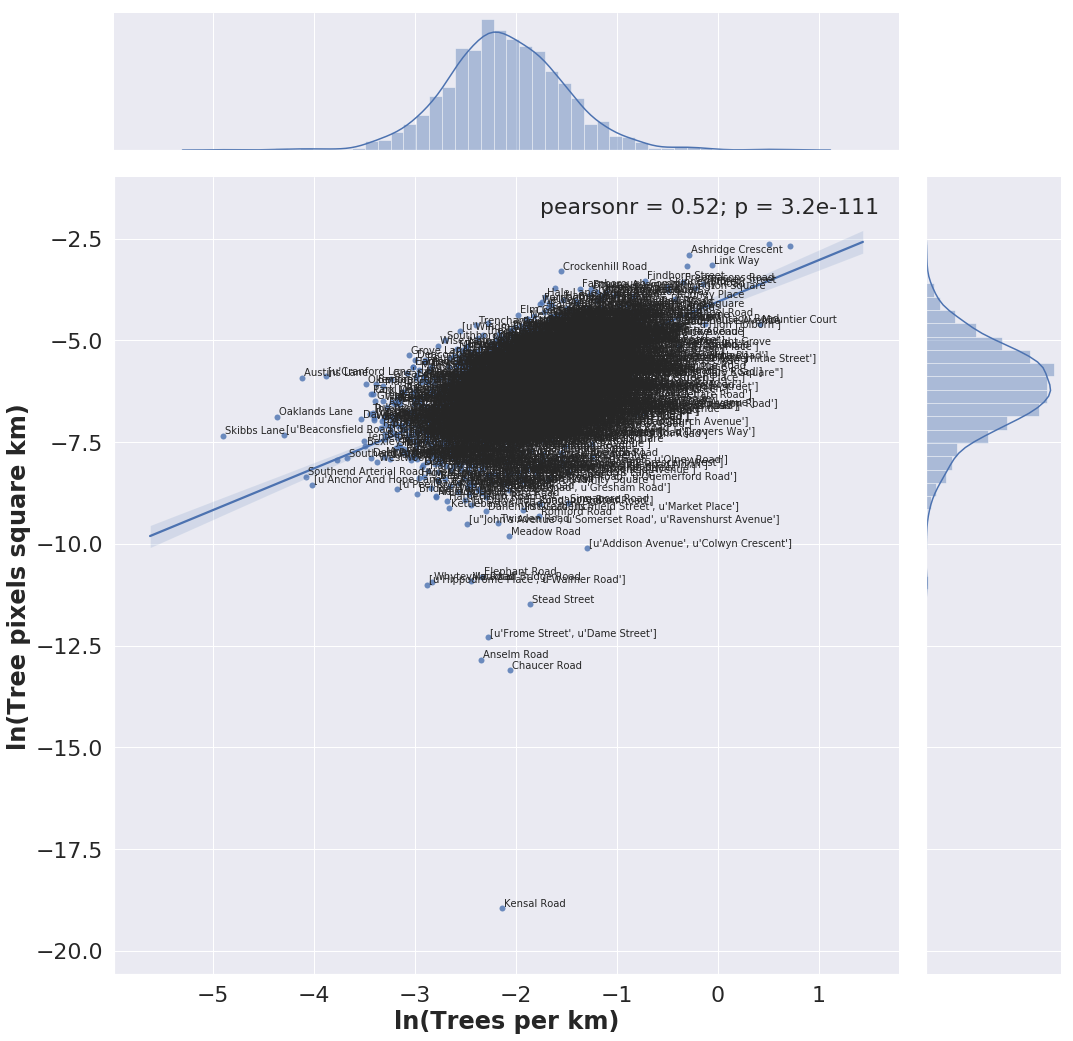

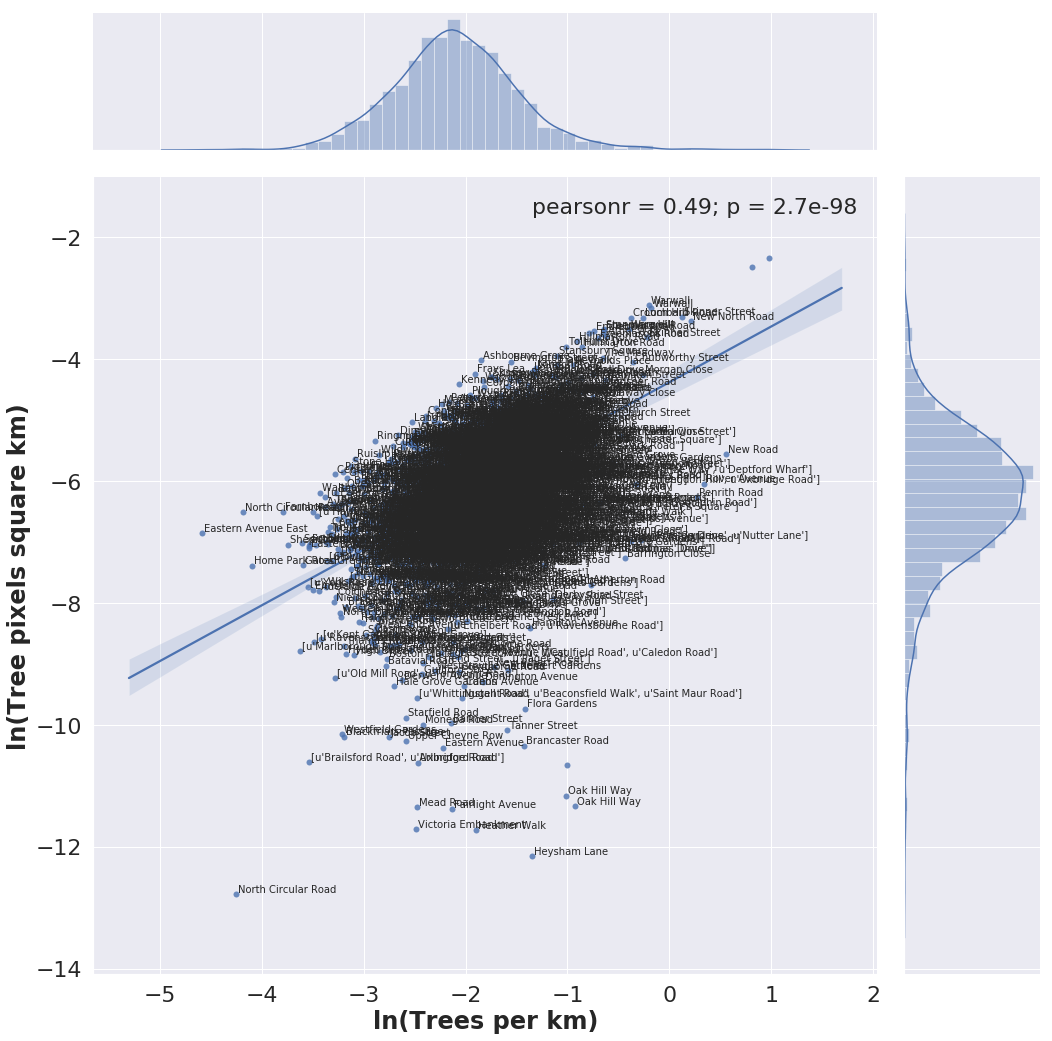

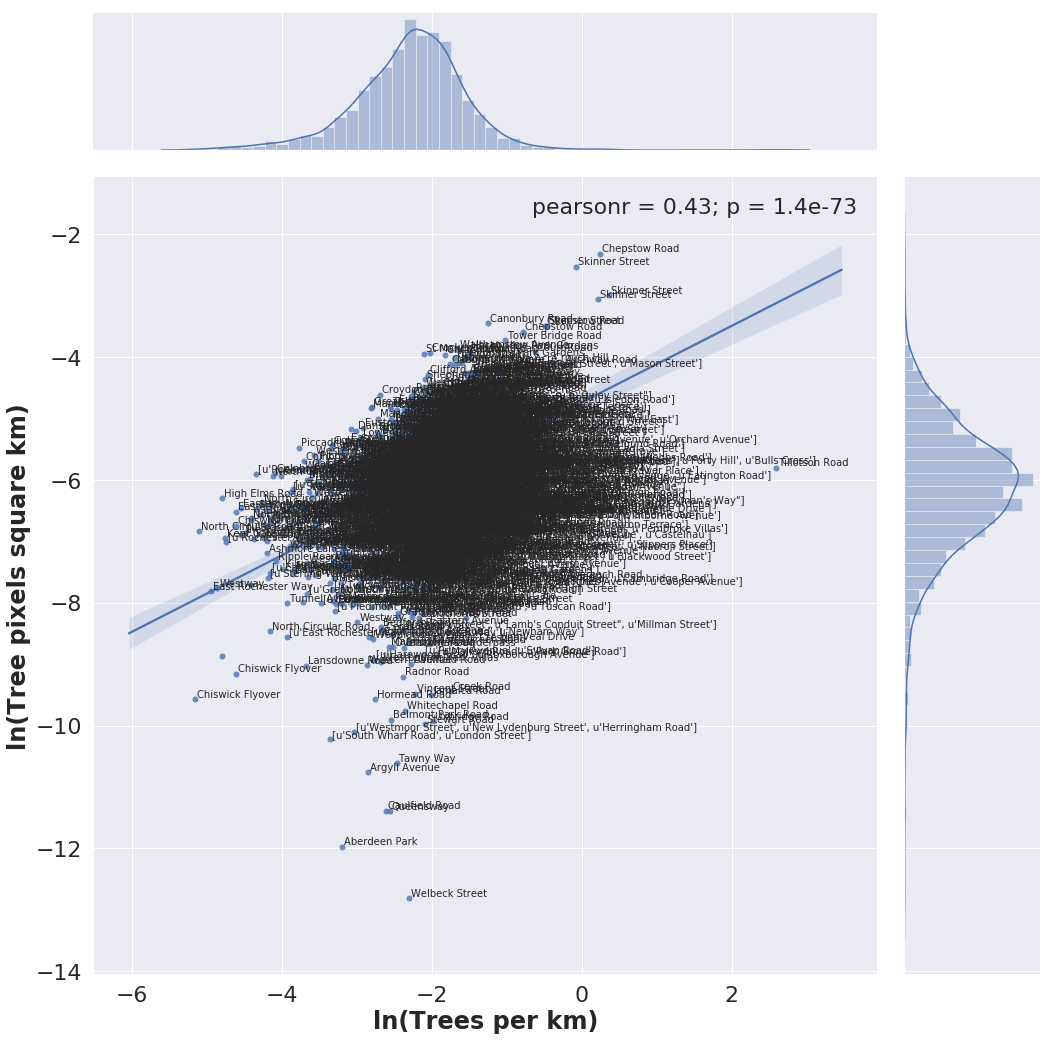

In [98]:
corrs_density = []
bins_density = []
for name, group in final_roads.groupby('decile'):
    bins_density.append(name)
    corr = pearsonr(group['Tree_density'],group['Tree_pixel_density'])

    print corr
    sns.set(font_scale=2) 
    ax = sns.jointplot(x="Tree_density", y="Tree_pixel_density", data=group,kind='regression',height=15);
    plt.xlabel('ln(Trees per km)')
    plt.ylabel('ln(Tree pixels square km)')
    ax.annotate(pearsonr)
    for row in group.iterrows():
        ann(row)
    corrs_density.append(corr)